In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.utils import to_categorical
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score



In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Class Imbalance Checks

In [9]:
target_column = 'DEATH_EVENT'


In [10]:
class_counts = df[target_column].value_counts()


In [11]:
imbalance_ratio = class_counts.min() / class_counts.max()


In [12]:
print("Class Counts: ")
print(class_counts)
print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}")


Class Counts: 
0    203
1     96
Name: DEATH_EVENT, dtype: int64
Class Imbalance Ratio: 0.47


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

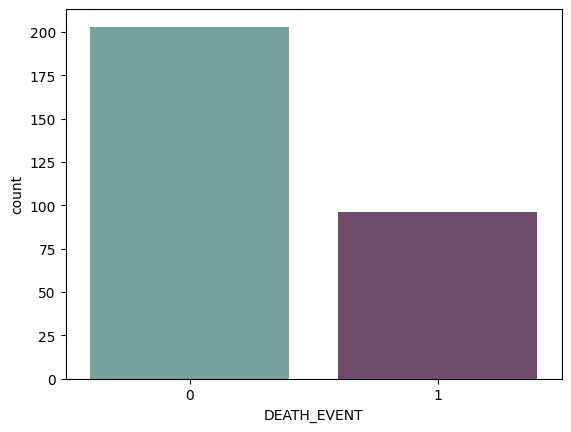

In [19]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= df["DEATH_EVENT"], palette= cols)

### There is a class imbalance in our dataset.

<Axes: >

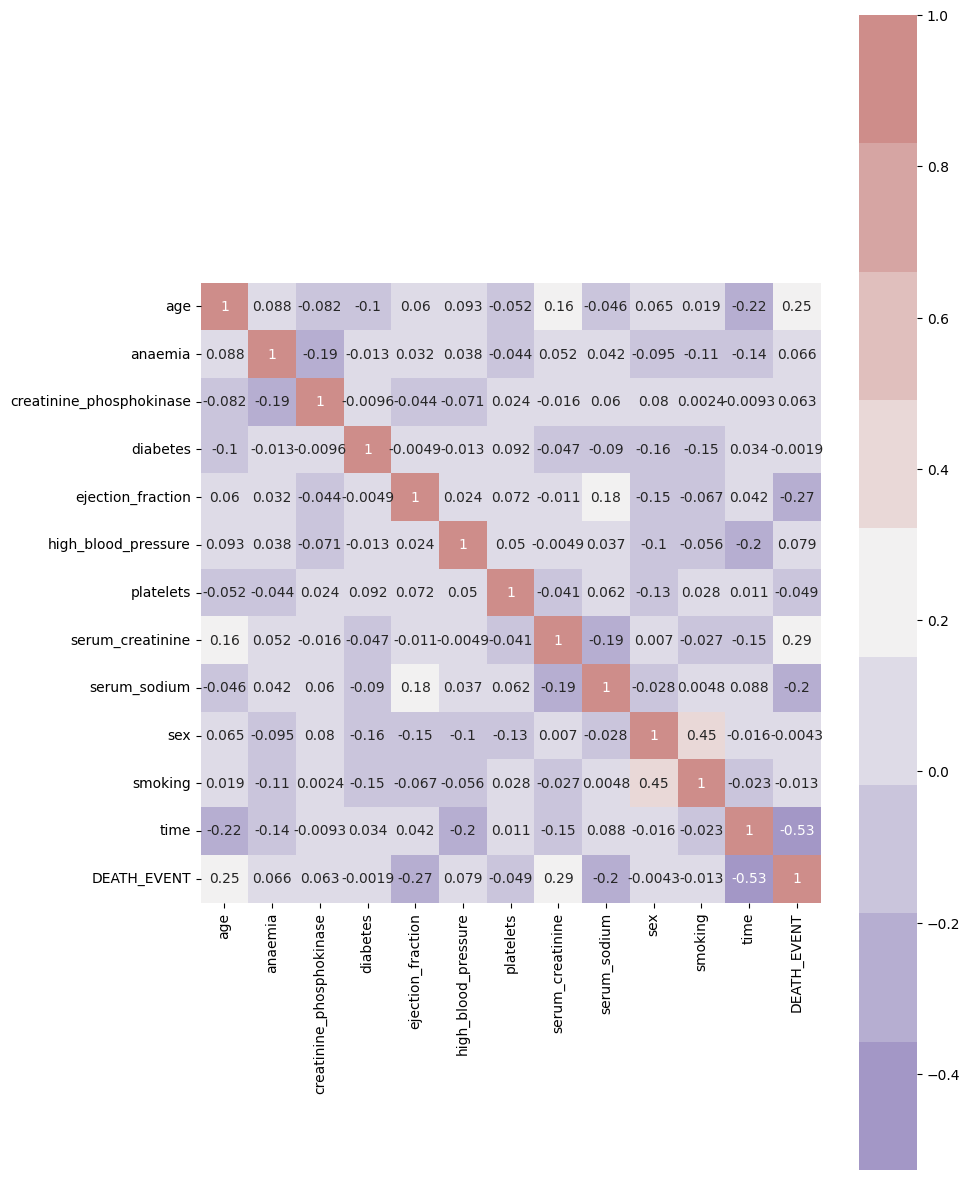

In [15]:
cmap = sns.diverging_palette(275, 15, s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(10, 15))
sns.heatmap(corrmat, cmap=cmap, annot = True, square=True)



### Evaluating the age distribution

Text(0.5, 1.0, 'Distribution Of Age')

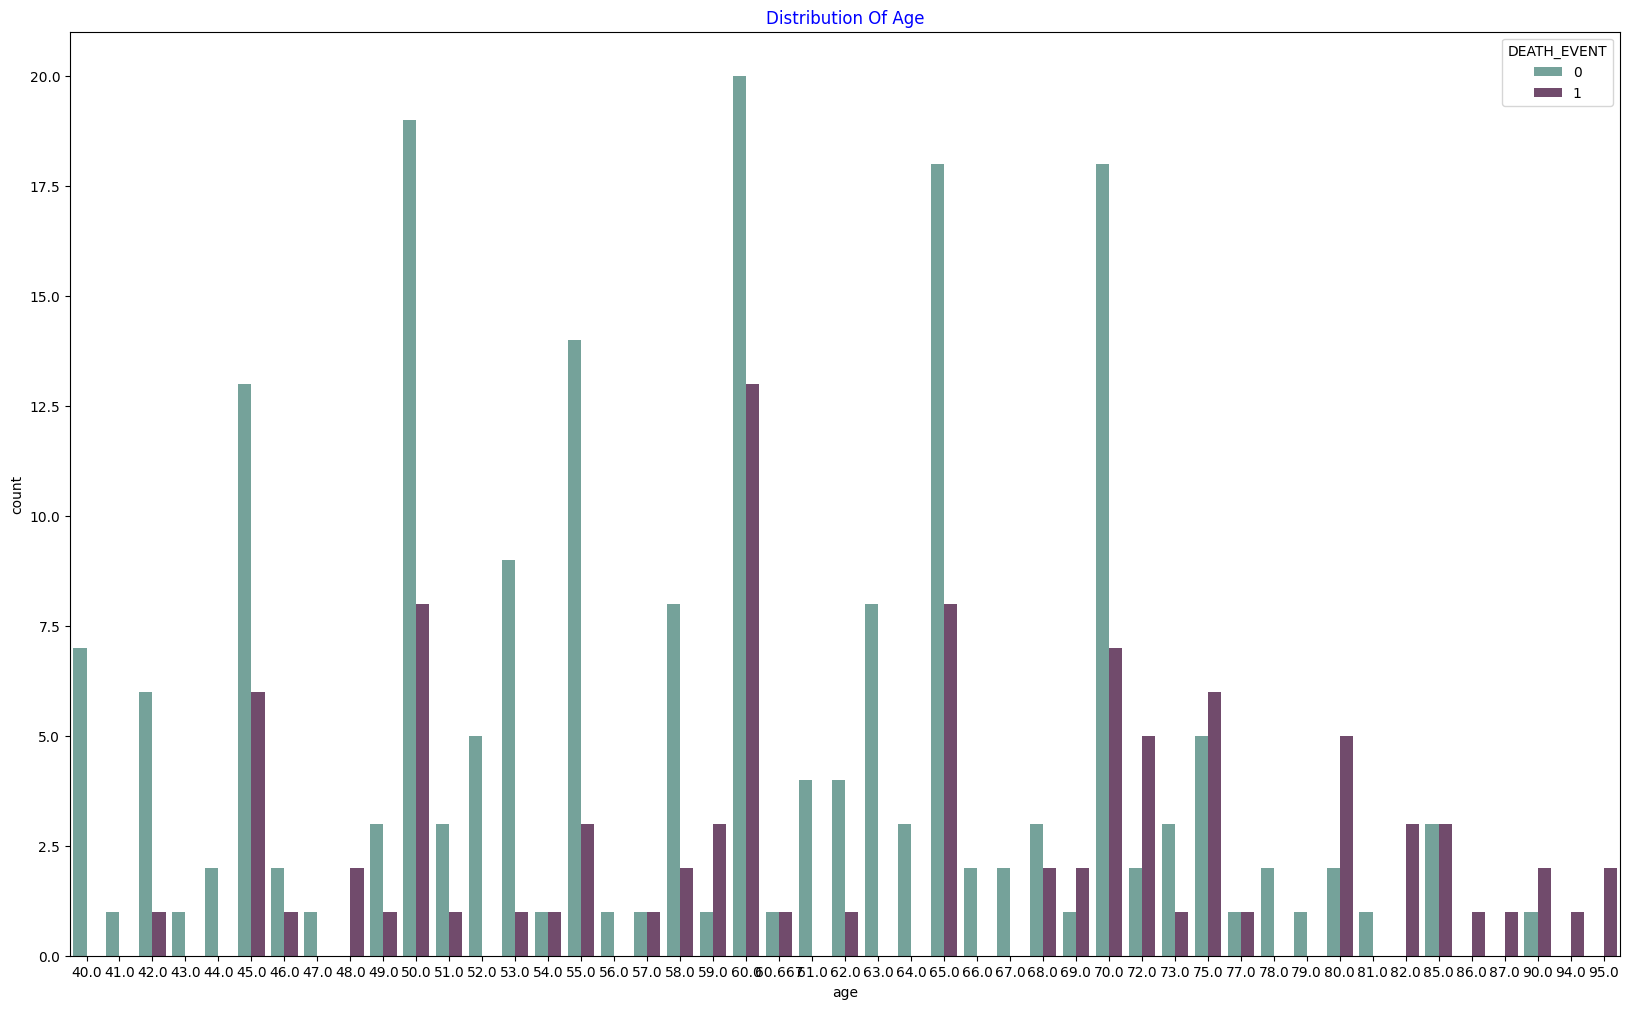

In [21]:
plt.figure(figsize=(20, 12))
Days_of_week = sns.countplot(x=df['age'], data=df, hue='DEATH_EVENT', palette=cols)
Days_of_week.set_title("Distribution Of Age", color='Blue')


<Axes: xlabel='time', ylabel='age'>

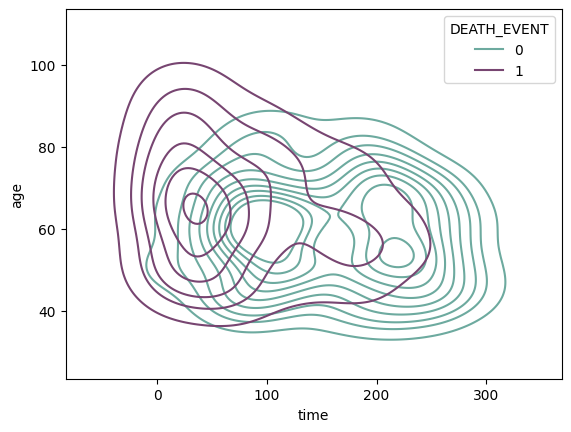

In [22]:
sns.kdeplot(x=df["time"], y=df["age"], hue=df["DEATH_EVENT"], palette=cols)


## Data Preprocessing

In [23]:
X = df.drop({"DEATH_EVENT"}, axis=1)
y = df["DEATH_EVENT"]


In [25]:
# Uisng a standard Scaler for this dataset.
col_names = list(X.columns)
s_scaler = StandardScaler()
X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


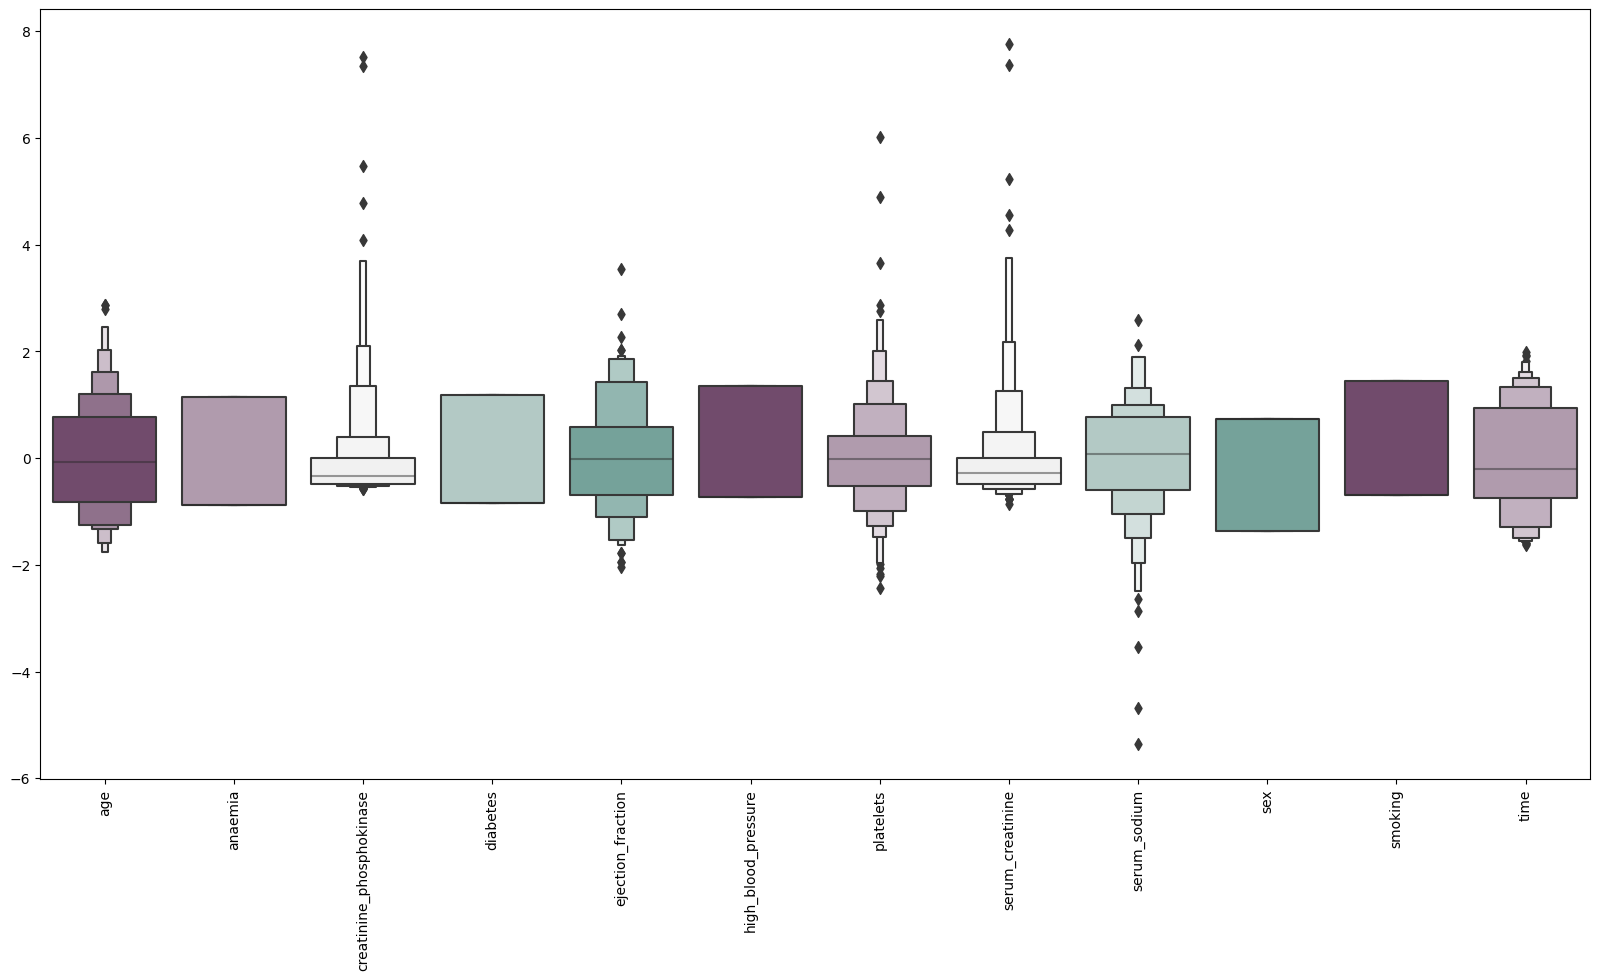

In [26]:
#looking at the scaled features
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

### Splitting the test and training sets.


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=7)


## Model Building

In [40]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20, # Number of epochs to wait before stopping.
    restore_best_weights=True
)

model = Sequential()

# Layers

model.add(Dense(units=16, kernel_initializer='uniform', activation=r'relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

from keras.optimizers import SGD

# Compilling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

# Train The ANN

history = model.fit(X_train, y_train, batch_size = 32, epochs=500, callbacks=[early_stopping], validation_split=0.2)




Epoch 1/500
6/6 [==============================] - 1s 50ms/step - loss: 0.6928 - accuracy: 0.6369 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6920 - accuracy: 0.6480 - val_loss: 0.6912 - val_accuracy: 0.6667
Epoch 3/500
6/6 [==============================] - 0s 14ms/step - loss: 0.6911 - accuracy: 0.6480 - val_loss: 0.6902 - val_accuracy: 0.6667
Epoch 4/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6902 - accuracy: 0.6480 - val_loss: 0.6892 - val_accuracy: 0.6667
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6894 - accuracy: 0.6480 - val_loss: 0.6881 - val_accuracy: 0.6667
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6883 - accuracy: 0.6480 - val_loss: 0.6869 - val_accuracy: 0.6667
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6872 - accuracy: 0.6480 - val_loss: 0.6857 - val_accuracy: 0.6667
Epoch 8/500
6/6 [=====

### Plotting training the Validation Loss over epochs

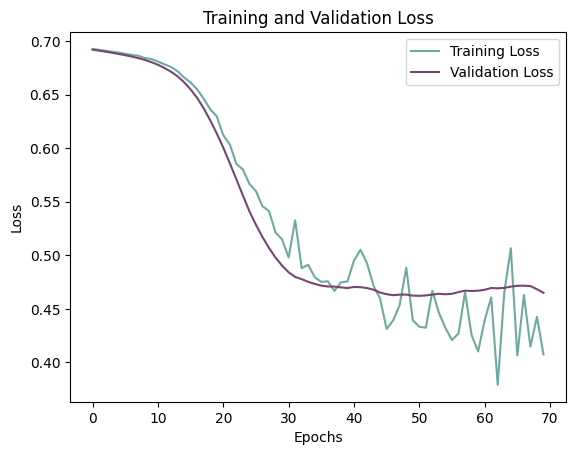

In [41]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training Loss')
plt.plot(history_df.loc[:, ['val_loss']], "#774571", label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()


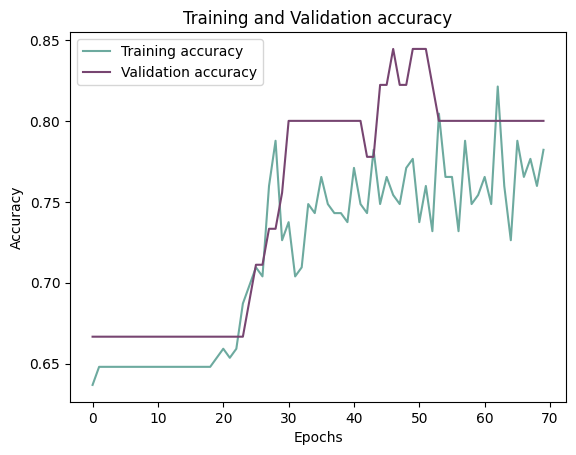

In [42]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], '#6daa9f', label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], '#774571', label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [43]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()



3/3 [==============================] - 0s 4ms/step


<Axes: >

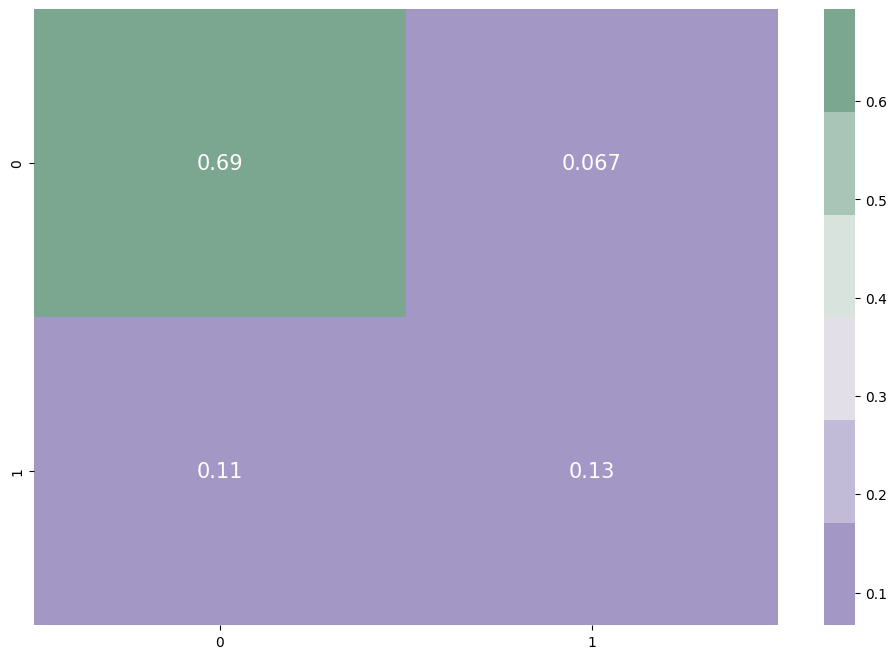

In [46]:
# Confusion Matrix
cmap = sns.diverging_palette(275, 150, s=40, l=65, n=6)
plt.subplots(figsize=(12, 8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap, annot = True, annot_kws = {'size':15})



In [47]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.67      0.56      0.61        18

    accuracy                           0.83        75
   macro avg       0.77      0.73      0.75        75
weighted avg       0.82      0.83      0.82        75

